In [10]:
import gzip
import pickle

import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df_genes = pd.read_csv('data/mm10_gene_ordering.tsv', names=['gene', 'chr', 'start', 'end'], sep='\t', index_col=0)
chromosome_order = [
    '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',
    '16', '17', '18', '19', 'X', 'Y'
]
with gzip.open('data/expansion_cnv_regions.pkl.gz', 'rb') as f:
    pickled = pickle.load(f)
expansion_cnv_gains = pickled['gains']
expansion_cnv_losses = pickled['losses']
bin_size = pickled['bin_size']
n_expansions = pickled['n_expansions']

gains losses 

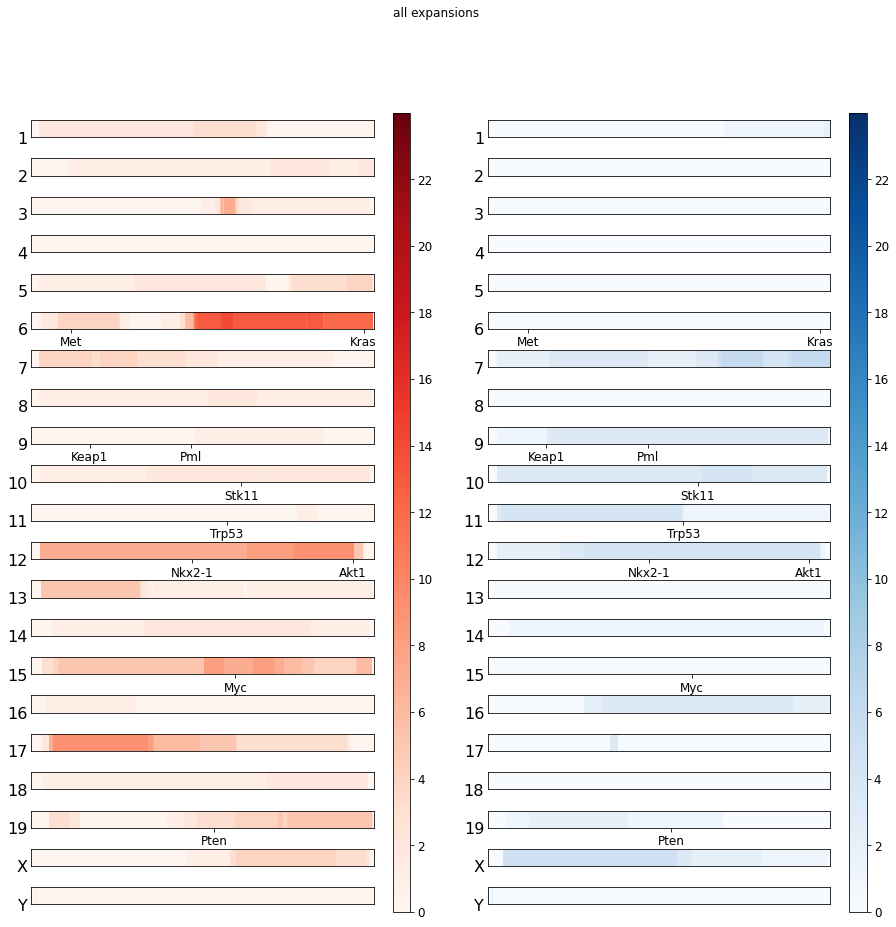

In [16]:
df_genes_upper = df_genes.copy()
df_genes_upper.index = df_genes_upper.index.str.upper()
gene_selections = [
    'Met',
    'Keap1',
#     'Smarca4',
    'Pml',
    'Stk11',
#     'Gna11',
    'Akt1',
    'Kras',
    'Nkx2-1',
    'Trp53',
    'Pten',
    'Myc',
]
annotations = {}
for gene in gene_selections:
    if gene.upper() in df_genes_upper.index:
        row = df_genes_upper.loc[gene.upper()]
        annotations.setdefault(row['chr'], []).append((gene, (row['end'] + row['start']) / (2 * bin_size)))

fig, axes = plt.subplots(nrows=len(chromosome_order), ncols=2, figsize=(15, 0.7 * len(chromosome_order)))
fig.suptitle('all expansions')

print('gains', end=' ')
for ax, chrom in zip(axes[:,0], chromosome_order):
    chromosome = expansion_cnv_gains[chrom]
    annotation = annotations.get(chrom, [])
    im = ax.imshow(
        chromosome.reshape(1, -1),
        aspect=len(chromosome) / 20,
        vmin=0,
        vmax=n_expansions,
        cmap='Reds'
    )
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.tick_params(axis='y' if annotation else 'both', which='both', length=0)
    ax.set_xticks([ann[1] for ann in annotation])
    ax.set_xticklabels([ann[0] for ann in annotation], fontsize=12)
    ax.set_yticks([0.5])
    ax.set_yticklabels([chrom], fontsize=16)
cbar = fig.colorbar(im, ax=axes[:,0].ravel().tolist(), fraction=0.05, aspect=45)
cbar.set_ticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
cbar.ax.tick_params(labelsize=12)

print('losses', end=' ')
for ax, chrom in zip(axes[:,1], chromosome_order):
    chromosome = expansion_cnv_losses[chrom]
    annotation = annotations.get(chrom, [])
    im = ax.imshow(
        chromosome.reshape(1, -1),
        aspect=len(chromosome) / 20,
        vmin=0,
        vmax=n_expansions,
        cmap='Blues'
    )
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.tick_params(axis='y' if annotation else 'both', which='both', length=0)
    ax.set_xticks([ann[1] for ann in annotation])
    ax.set_xticklabels([ann[0] for ann in annotation], fontsize=12)
    ax.set_yticks([0.5])
    ax.set_yticklabels([chrom], fontsize=16)
cbar = fig.colorbar(im, ax=axes[:,1].ravel().tolist(), fraction=0.05, aspect=45)
cbar.set_ticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
cbar.ax.tick_params(labelsize=12)